In [1]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import separate_stains
from skimage.util import dtype, dtype_limits
from skimage.transform import rescale, resize, downscale_local_mean


In [10]:
with open('16.07.03 E14-E18 IUE SRGAP2C 1-1.tif', 'rb') as file:
    metadata = file.readlines(5)

In [3]:
fig = imageio.mimread('7383 Rbx2 Control 2-Extended Depth of Focus-13_cropped.jpg')

In [177]:
figL = imageio.imread('7388 Rbx2 Mut 1-Extended Depth of Focus-15.tiff')

In [178]:
if figL.shape[0] > 2000 or figL.shape[1] > 2000:
    if figL.shape[0] > figL.shape[1]: resize_factor = 2000/figL.shape[0]
    else:resize_factor = 2000/figL.shape[1]
    figL = resize(figL, (int(figL.shape[0] * resize_factor), int(figL.shape[1] * resize_factor)),anti_aliasing=True)*255

In [180]:
figL.min()

0.0

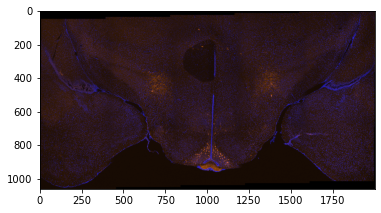

In [181]:
plt.imshow(figL)

In [47]:
fig[:,:,2]

Array([[ 2,  2,  3, ...,  2,  2,  2],
       [ 2,  2,  3, ...,  2,  2,  2],
       [ 2,  2,  2, ...,  2,  2,  2],
       ...,
       [53, 55, 59, ...,  1,  1,  1],
       [52, 54, 58, ...,  2,  2,  2],
       [51, 53, 57, ...,  3,  3,  3]], dtype=uint8)

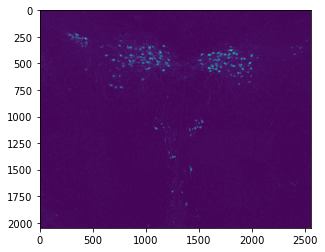

In [50]:
plt.imshow(fig[:,:,0]+fig[:,:,1].astype(float))

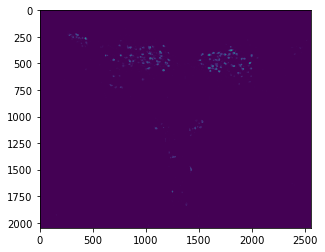

In [58]:
figure2 = fig[:,:,0]*fig[:,:,1].astype(float)
figure3 = 255*(figure2 - figure2.min())/ (figure2.max() - figure2.min())
plt.imshow(figure3.astype('uint8'))

In [142]:
1e4

10000.0

In [ ]:
plt.imshow(fig[:,:,0]+fig[:,:,1].astype(float))

In [89]:
orange_color = np.array([80, 46, 0]) 
orange_color

array([80, 46,  0])

In [138]:
from skimage.feature import blob_dog, blob_log
from skimage.filters import median

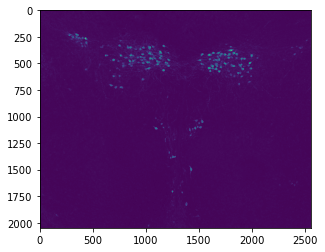

In [141]:
plt.imshow(median(fig)[:,:, 0])

In [9]:
from skimage.color import (separate_stains, combine_stains,  hdx_from_rgb, rgb_from_hdx)

In [17]:
hdx_from_rgb

array([[ 1.20013702, -0.6897672 ,  1.05605387],
       [ 0.68523338,  0.02360991, -1.17857556],
       [-0.91780895,  1.50953603,  0.50098664]])

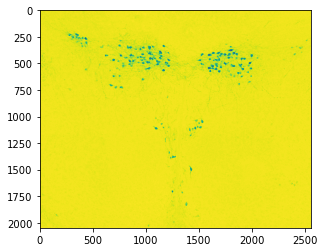

In [59]:
rgb = dtype.img_as_float(fig, force_copy=True) +2
#rgb = fig.astype(float)

reshaped_rgb = np.reshape(-np.log(rgb), (-1, 3))
stains = np.dot(reshaped_rgb, orange_color)
plt.imshow(np.reshape(stains, (rgb.shape[0], rgb.shape[1],1)))

In [44]:
rgb.shape

(2048, 2552, 3)

In [133]:
def extract_specific_color_from_image(figure2transform, color_rep_rgb):
    rgb_temp = dtype.img_as_float(figure2transform, force_copy=True) + 2
    reshaped_rgb = np.reshape(-np.log(rgb_temp), (-1, 3))
    single_stain = -np.dot(reshaped_rgb, color_rep_rgb)
    single_stain = 255*(single_stain - single_stain.min())/ (single_stain.max() - single_stain.min())
    return np.reshape(single_stain, (rgb_temp.shape[0], rgb_temp.shape[1]))

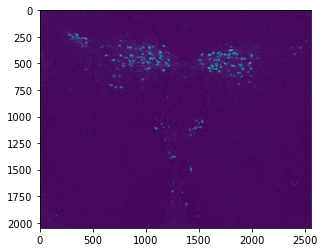

In [134]:
plt.imshow(extract_specific_color_from_image(fig, orange_color/255))

In [136]:
intermediary_fig = extract_specific_color_from_image(fig, orange_color/255)
intermediary_fig.min()

0.0

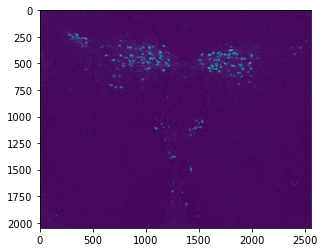

In [122]:
plt.imshow(intermediary_fig)

In [117]:
logs = blob_log(intermediary_fig, max_sigma=10, min_sigma =5, threshold=.05 ) 

In [99]:
intermediary_fig

array([[246.74363765, 246.74363765, 245.32984115, ..., 248.39658856,
        248.39658856, 248.39658856],
       [246.74363765, 246.74363765, 245.32984115, ..., 248.39658856,
        248.39658856, 248.39658856],
       [246.74363765, 246.74363765, 246.74363765, ..., 248.39658856,
        248.39658856, 248.39658856],
       ...,
       [245.94672798, 245.94672798, 245.04943862, ..., 248.16017791,
        248.16017791, 248.16017791],
       [247.36169934, 247.36169934, 246.46266936, ..., 246.74363765,
        246.74363765, 246.74363765],
       [248.77941894, 248.77941894, 247.87864158, ..., 245.32984115,
        245.32984115, 245.32984115]])

In [118]:
logs.shape

(435, 3)

1. asda
    1. asd